 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [1]:
def check_normality(data):
    statistic, p_value = stats.shapiro(data)
    if p_value < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [4]:
import numpy as np
from scipy import stats

np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [18]:
t_stat, p_value = stats.ttest_ind(mens, womens, equal_var=True)

if p_value < 0.001:
    print("Отклоняем нулевую гипотезу >> Различие между выборками статистически значимо")
else:
    print("Не отклоняем нулевую гипотезу >> Различие между выборками незначительно")


Отклоняем нулевую гипотезу >> Различие между выборками статистически значимо


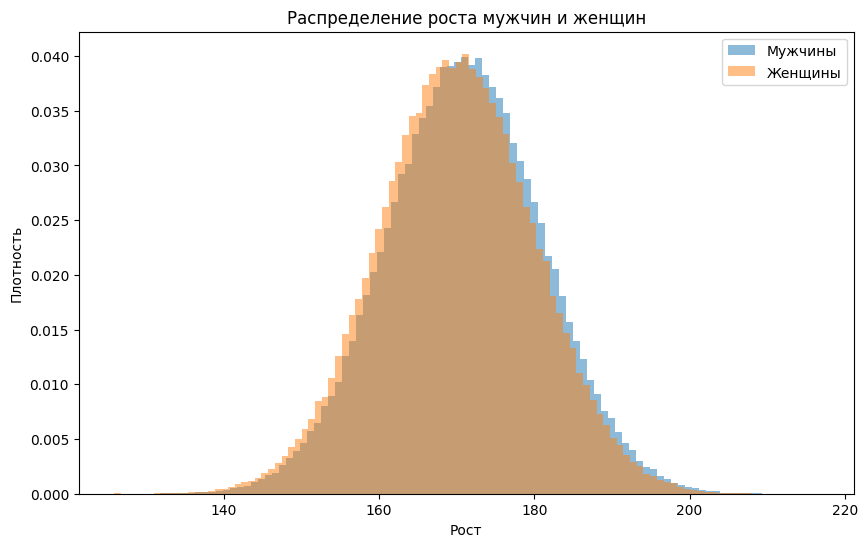

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mens, bins=100, alpha=0.5, label='Мужчины', density=True)
plt.hist(womens, bins=100, alpha=0.5, label='Женщины', density=True)
plt.xlabel('Рост')
plt.ylabel('Плотность')
plt.title('Распределение роста мужчин и женщин')
plt.legend()
plt.show()

In [17]:
abs(mens.mean() - womens.mean())

np.float64(1.033761414316217)

Так как разница между средними выборок всего 1 см, то с практической точки зрения это не является значимым отклонением, так как кол-во данных в выборках у нас достаточно большое 

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [25]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]


In [27]:
stat1, p_value1 = stats.shapiro(test_team)
stat2, p_value2 = stats.shapiro(developer_team)

if p_value1 > 0.05 and p_value2 > 0.05:
    print("Оба распределения нормальные")
else:
    print("Хотя бы одно распределение не нормальное")

Хотя бы одно распределение не нормальное


In [30]:
u_stat, p_value = stats.mannwhitneyu(test_team, developer_team)

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу >> Есть разница в переутомлении")
else:
    print("Не отклоняем нулевую гипотезу >> Нет разницы в переутомлении")


Не отклоняем нулевую гипотезу >> Нет разницы в переутомлении


<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [32]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [40]:
# Проверяем нормальность распределения каждой из 3-х групп
stat1, p_value1 = stats.shapiro(only_breast)
stat2, p_value2 = stats.shapiro(only_formula)
stat3, p_value3 = stats.shapiro(both)


if p_value1 > 0.05 and p_value2 > 0.05 and p_value3 > 0.05:
    print("Все распределения нормальные")
else:
    print("Хотя бы одно распределение не нормальное")

Все распределения нормальные


list

In [36]:
# Проводим однофакторный дисперсионный анализ
stat, p_value = stats.f_oneway(only_breast, only_formula, both)

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу >> Есть разница в привесе младенцев между группами")
else:
    print("Не отклоняем нулевую гипотезу >> Нет разницы в привесе младенцев между группами")

Отклоняем нулевую гипотезу >> Есть разница в привесе младенцев между группами


In [49]:
result= stats.tukey_hsd(only_breast, only_formula, both)
print(result)


Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -209.392     0.000  -281.434  -137.351
 (0 - 2)    -60.129     0.100  -129.149     8.891
 (1 - 0)    209.392     0.000   137.351   281.434
 (1 - 2)    149.264     0.000    82.365   216.162
 (2 - 0)     60.129     0.100    -8.891   129.149
 (2 - 1)   -149.264     0.000  -216.162   -82.365



Опираясь на данные теста Тьюки можно сказать, что разница в привесе между теми, кто на грудном всармливании и на смесь достаточно значимая, т.к. р - 0, а доверит интервал не включает 0. Разница в привесе между теми, кто на грудном вскармливании и смещанном есть, но она незначительная, т.к. р > 0.05, а дов интервал включает 0. И разница в привесе между теми, кто на смеси и на смешинном вскармливании также значительная, т.к. р = 0, а дов интервал не включает 0. 
Это позволяет предположить, что смесь способствует большей прибавке в весе, чем грудное молоко, возможная причина: смесь может содержать больше калорий, чем грудное молоко

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.